In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fd = pd.read_csv('Animation_Movies.csv')
fd

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51940,656677,Белозубка,0.000,0,Released,2018-12-20,0,0,False,NaN,...,ru,Белозубка,NaN,0.600,/r9rYEqBVJIHDUZZPyCkstkiM8Z2.jpg,NaN,Animation,NaN,Russia,NaN
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,/jQMHu7B7LOY3R2PNJA4bBahEewN.jpg,...,ja,映画しまじろう しまじろうとうるるのヒーローランド,Hero Land is a world where you can meet the he...,2.531,/yGthNH49g4ezKLrn6cUNKygcbtz.jpg,NaN,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,NaN,...,en,Robo Force: The Revenge of Nazgar,"TV Short for Robo Force, included in Challenge...",1.952,/2l6C7P7zFE5WaLdpyzayYfWdIbW.jpg,NaN,"Animation, Action, Science Fiction",NaN,NaN,English
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,NaN,...,en,Beginning Responsibility: A Lunchroom Goes Ban...,The food in Plumcrest School Cafeteria has gon...,0.600,NaN,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English


In [ ]:
df = fd.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

****Now let's do some data cleaning work****

In [ ]:
kd = df.drop(['tagline','poster_path','backdrop_path','homepage','imdb_id'], axis=1)
df = kd.copy()

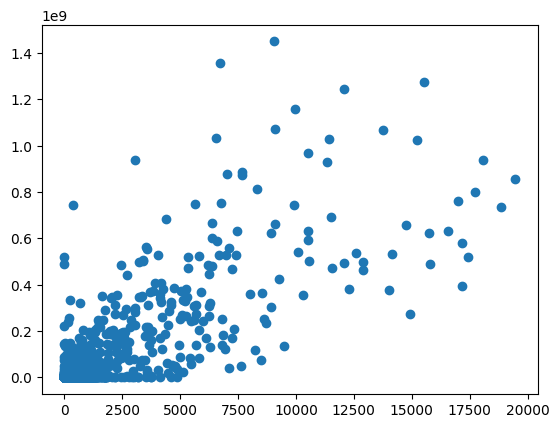

In [ ]:
plt.scatter(df['vote_count'],df['revenue'])

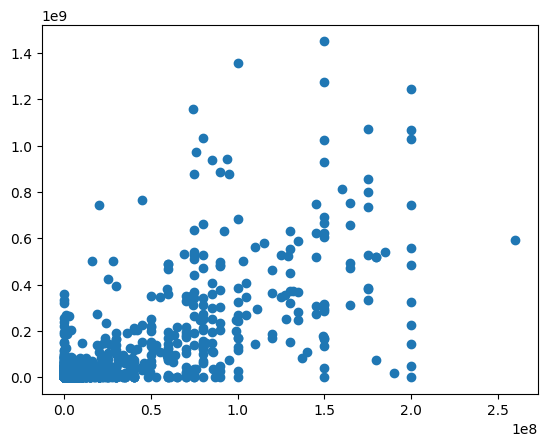

In [ ]:
plt.scatter(df['budget'],df['revenue'])

<Axes: >

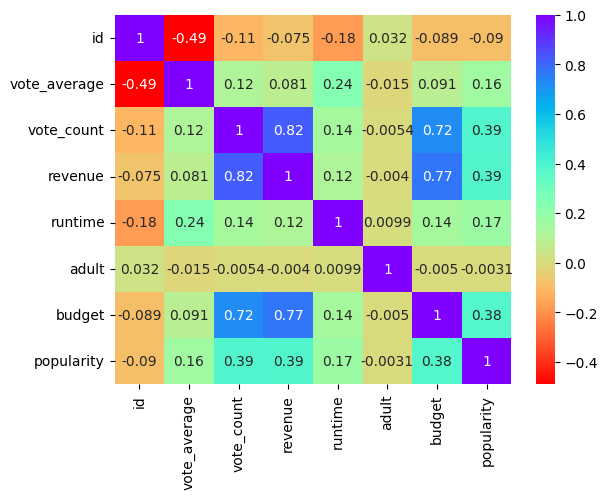

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="rainbow_r")

we can clearly see few co-relations in this heatmap

In [ ]:
df["spoken_languages"].unique()

array(['English', 'English, Spanish', 'French, English',
       'English, French', 'Japanese', 'English, Japanese, Spanish',
       'English, Italian, Japanese, Yiddish',
       'English, French, German, Portuguese, Spanish',
       'English, Mandarin', 'Spanish, English', 'English, Italian',
       'English, French, German, Italian, Japanese',
       'English, Spanish, Greek', 'English, Portuguese',
       'Croatian, English, Inuktitut', 'English, Russian, French',
       'English, French, Latin', 'Latin, English',
       'Cantonese, Mandarin, Korean, French, English',
       'English, Japanese', 'English, Hindi, Italian, Spanish',
       'English, French, Spanish', 'English, Spanish, French, Japanese',
       'Hebrew, English', 'English, Northern Sami',
       'French, German, Italian, Japanese', 'Mandarin, English',
       'English, Yiddish', 'Persian, French, German',
       'English, Latin, Spanish', 'French, English, Portuguese',
       'Portuguese, English', 'English, Galician, 

In this we can see that movies are translated into many languages and released

In [ ]:
top10_prod_comp = df['spoken_languages'].value_counts().index[:10]
top5 = df.loc[df['spoken_languages'].isin(top10_prod_comp)]

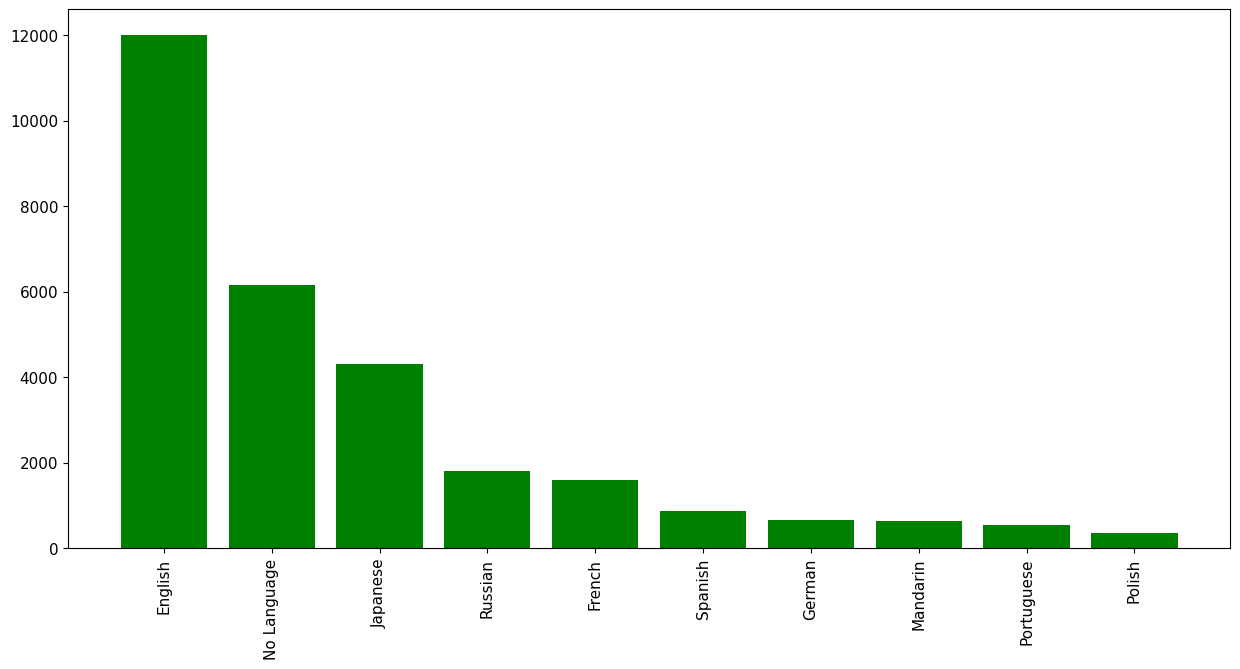

In [ ]:
x = top5['spoken_languages'].value_counts().index
y = top5['spoken_languages'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(x, y, color="green")
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

This graph clearly shows that movies are highly released in English but it does not count the movies that are released in multiple release.

In [ ]:
print(df['production_countries'].unique())
df["production_countries"].nunique()

['United States of America' 'Japan'
 'Australia, Denmark, United States of America' ... 'Spain, Estonia'
 'Germany, East Germany' 'Bosnia and Herzegovina, Croatia']


1096

In [ ]:
top10_prod_comp = df['production_countries'].value_counts().index[:10]
top5 = df.loc[df['production_countries'].isin(top10_prod_comp)]
top10_prod_comp

Index(['United States of America', 'Japan', 'France', 'United Kingdom',
       'Canada', 'Soviet Union', 'Germany', 'Russia', 'Poland', 'China'],
      dtype='object', name='production_countries')

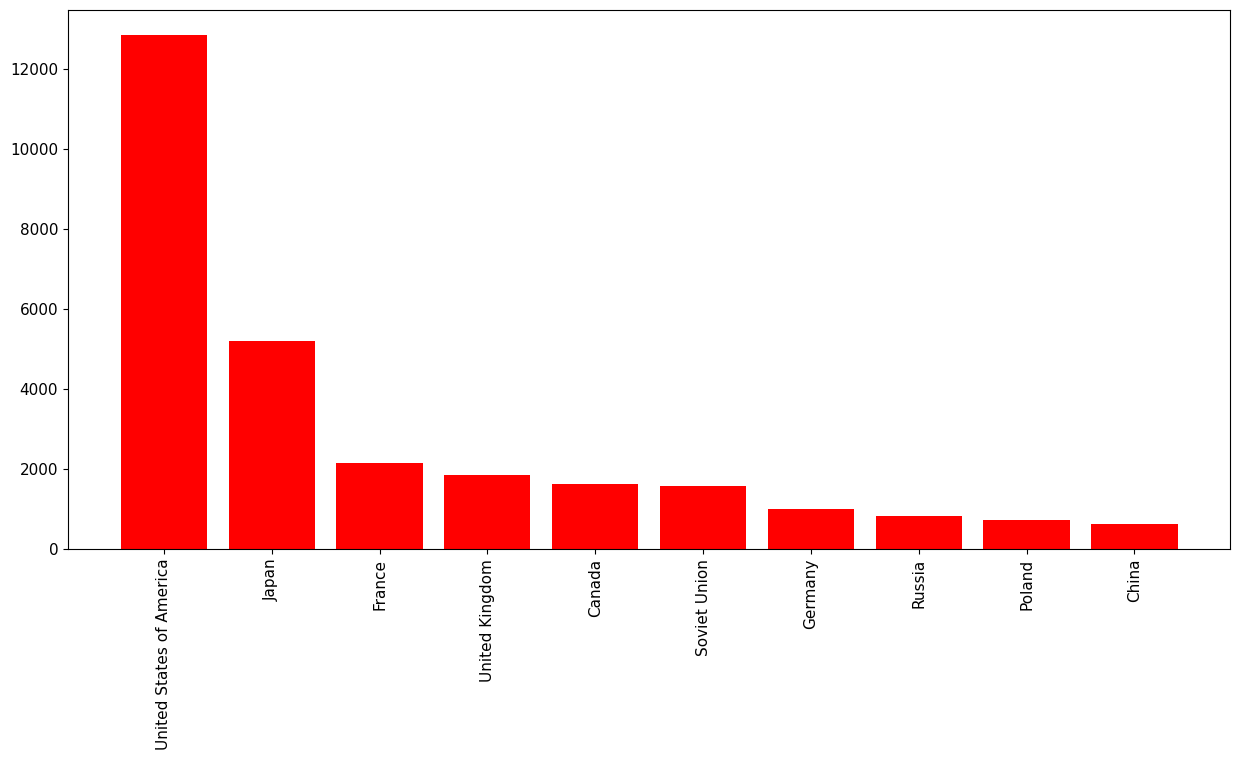

In [ ]:
x = top5['production_countries'].value_counts().index
y = top5['production_countries'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(x, y, color="red")
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [ ]:
print(df['production_companies'].unique())
df["production_companies"].nunique()

['Pixar, Walt Disney Pictures' 'Pixar'
 'Walt Disney Pictures, Walt Disney Feature Animation' ... 'ANIMA LATINA'
 'Benesse, Sony Music Direct, TOHO, The Answer Studio, Backstreets Inc., TV Setouchi Broadcasting (TSC)'
 'Studio Neum, Zagreb Film']


11196

In [ ]:
top10_prod_comp = df['production_companies'].value_counts().index[:10]
top5 = df.loc[df['production_companies'].isin(top10_prod_comp)]

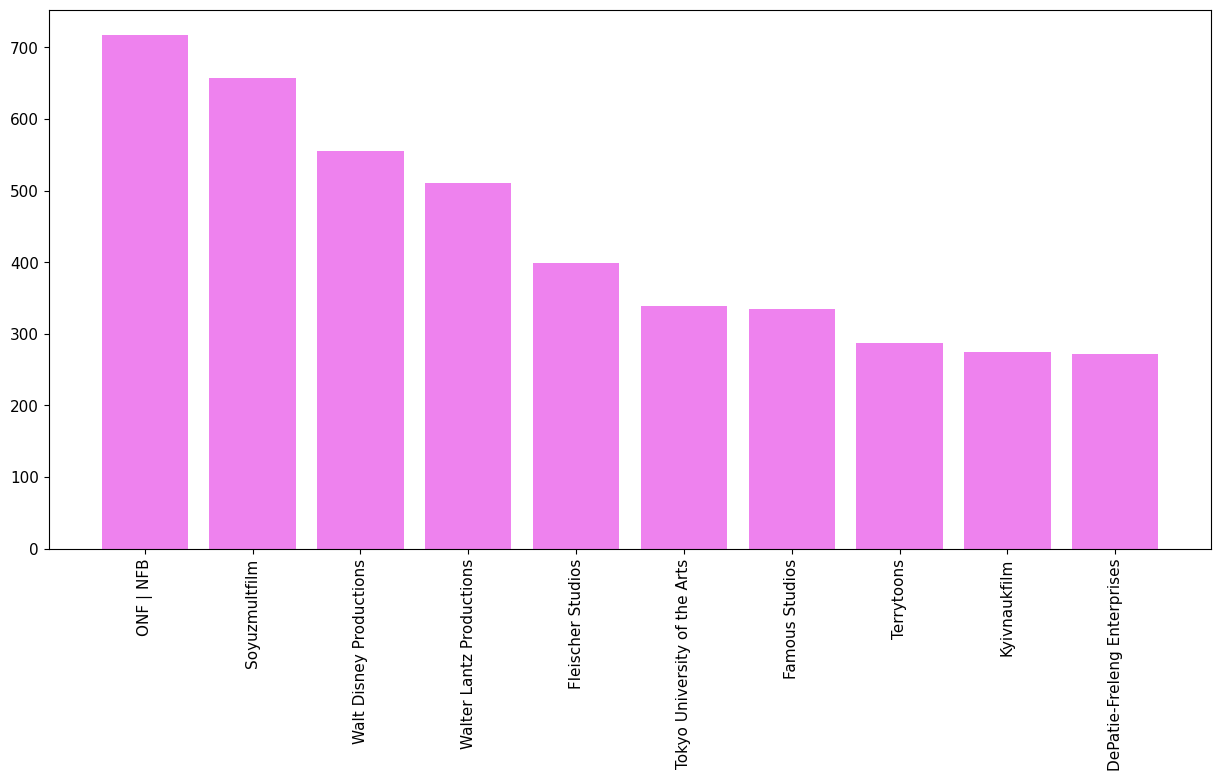

In [ ]:
x = top5['production_companies'].value_counts().index
y = top5['production_companies'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(x, y, color="violet")
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [ ]:
kd = df.drop(['production_countries', 'production_companies', 'spoken_languages', 'overview'], axis=1)
df = kd.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51945 non-null  int64  
 1   title              51944 non-null  object 
 2   vote_average       51945 non-null  float64
 3   vote_count         51945 non-null  int64  
 4   status             51945 non-null  object 
 5   release_date       49808 non-null  object 
 6   revenue            51945 non-null  int64  
 7   runtime            51945 non-null  int64  
 8   adult              51945 non-null  bool   
 9   budget             51945 non-null  int64  
 10  original_language  51945 non-null  object 
 11  original_title     51944 non-null  object 
 12  popularity         51945 non-null  float64
 13  genres             51945 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 5.2+ MB


In [ ]:
print(df['original_language'].nunique())
print(df['original_language'].unique())

102
['en' 'ja' 'fr' 'he' 'it' 'es' 'zh' 'pl' 'uk' 'ko' 'da' 'ru' 'de' 'cs'
 'pt' 'xx' 'tr' 'fi' 'hu' 'no' 'fa' 'dz' 'sr' 'th' 'is' 'sv' 'nl' 'la'
 'eu' 'hi' 'ta' 'ar' 'sk' 'cn' 'gl' 'sh' 'lv' 'ms' 'et' 'el' 'nb' 'mo'
 'hr' 'ur' 'pa' 'tl' 'ro' 'sl' 'ca' 'iu' 'hy' 'bg' 'ga' 'si' 'id' 'uz'
 'mi' 'bn' 'lt' 'sq' 'os' 'bs' 'mn' 'ml' 'sa' 'ab' 'te' 'be' 'vi' 'zu'
 'ku' 'ka' 'nn' 'oc' 'as' 'mk' 'ht' 'sw' 'cy' 'af' 'cr' 'gn' 'mr' 'qu'
 'ha' 'yi' 'st' 'kk' 'az' 'my' 'am' 'mg' 'bo' 'se' 'jv' 'ch' 'kl' 'gd'
 'lb' 'tk' 'so' 'ne']


In [ ]:
top10_prod_comp = df['original_language'].value_counts().index[:10]
top5 = df.loc[df['original_language'].isin(top10_prod_comp)]

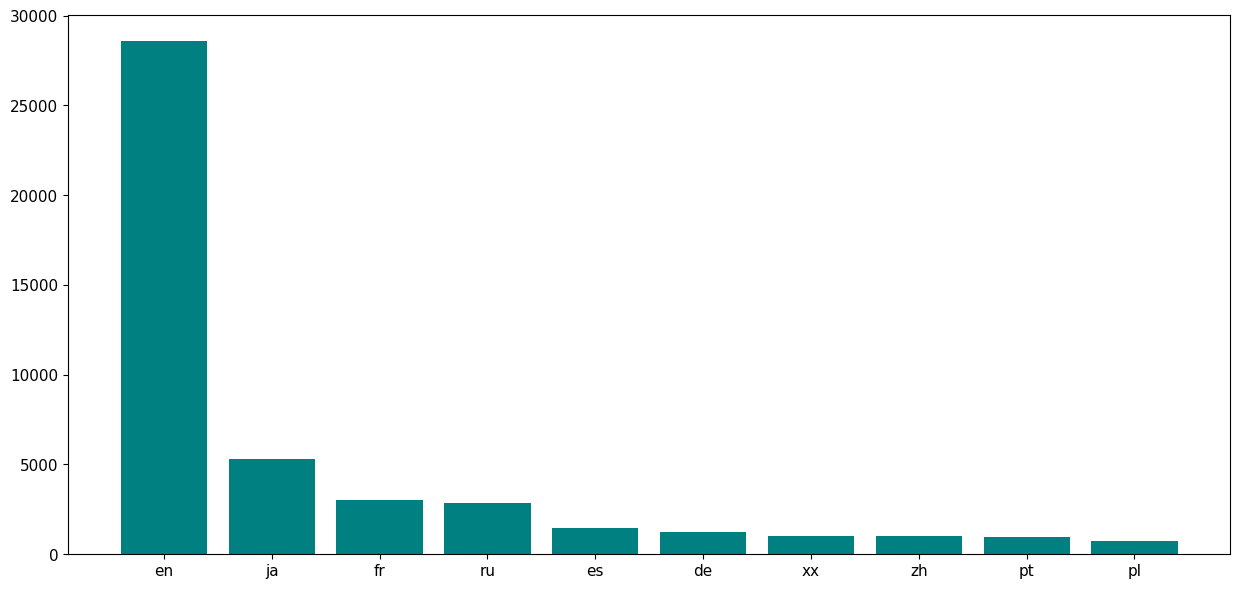

In [ ]:
x = top5['original_language'].value_counts().index
y = top5['original_language'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(x, y, color="teal")
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#**Now let's understand our dataset**

In [ ]:
df['vote_count'].min()

0

In [ ]:
no_vote = df[(df['vote_count'] == 0)]
no_vote

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
21166,950012,"I, Labyrinth",0.0,0,Released,2021-11-21,0,11,False,0,tl,"I, Labyrinth",0.600,"Animation, Adventure"
21167,952930,Tilt,0.0,0,Released,1972-01-01,0,19,False,0,en,Tilt,0.600,Animation
21168,950021,An Introduction to Jet Engines,0.0,0,Released,1959-01-01,0,13,False,0,en,An Introduction to Jet Engines,0.600,"Documentary, Animation"
21169,948402,Bric ‘n Brac,0.0,0,Released,1959-01-01,0,0,False,0,en,Bric ‘n Brac,0.600,Animation
21170,948396,The Glow Worm,0.0,0,Released,1930-08-18,0,7,False,0,en,The Glow Worm,0.600,Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51940,656677,Белозубка,0.0,0,Released,2018-12-20,0,0,False,0,ru,Белозубка,0.600,Animation
51941,657149,Shimajiro to Ururu no Heroland,0.0,0,Released,2019-03-15,0,60,False,0,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,"Family, Animation, Fantasy"
51942,656945,Robo Force: The Revenge of Nazgar,0.0,0,Released,1984-12-08,0,22,False,0,en,Robo Force: The Revenge of Nazgar,1.952,"Animation, Action, Science Fiction"
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.0,0,Released,1978-01-01,0,12,False,0,en,Beginning Responsibility: A Lunchroom Goes Ban...,0.600,"Animation, Documentary, Family"


In [ ]:
no_vote[(no_vote['revenue'] >= 1)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
21580,934455,Fart: The Movie Pilot,0.0,0,Released,2022-02-03,1,5,False,0,en,Fart: The Movie Pilot,0.60,"Animation, Comedy"
21671,931103,The New Album Is Out,0.0,0,Released,2021-11-30,600,0,False,100,pt,The New Album Is Out,0.60,Animation
22512,1182271,H-151: Perfect Machine,0.0,0,Released,NaN,500,15,False,200,en,H-151: Perfect Machine,1.34,"Animation, Action, Crime, Drama, Family, Fanta..."
22616,970196,The confession of a motor,0.0,0,Released,2021-09-18,10,16,False,20,ta,Oru motorin vaakumoolam - ஒரு மோட்டாரின் வாக்க...,0.60,"Mystery, Drama, Animation"
22706,1235268,Seltser Babies,0.0,0,Released,2024-01-23,11,123,False,10,en,Seltser Babies,1.40,"Animation, Action, Adventure, Comedy, Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51192,646484,HX-01,0.0,0,Released,2017-04-14,12000,37,False,8000,en,HX-01,0.60,Animation
51209,644920,Bulmaca Kulesi: Dev Kuşun Gizemi,0.0,0,Released,2019-10-15,149485,0,False,0,tr,Bulmaca Kulesi: Dev Kuşun Gizemi,0.60,"Animation, Adventure"
51451,642399,Fear of the Moth,0.0,0,Released,2018-05-18,2,8,False,30,en,Fear of the Moth,0.60,"Thriller, Animation"
51544,664389,The Secret Princess,0.0,0,Released,2014-12-01,500000,94,False,0,en,The Secret Princess,0.60,Animation


In [ ]:
df[(df['budget'] == 0)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
32,372058,Your Name.,8.514,10303,Released,2016-08-26,357986087,106,False,0,ja,君の名は。,68.999,"Romance, Animation, Drama"
131,9732,The Lion King II: Simba's Pride,6.941,4130,Released,1998-10-24,0,81,False,0,en,The Lion King II: Simba's Pride,51.941,"Family, Adventure, Animation, Action"
140,8965,Atlantis: Milo's Return,6.334,3728,Released,2003-02-25,0,80,False,0,en,Atlantis: Milo's Return,17.753,"Fantasy, Animation, Science Fiction, Family, A..."
147,378064,A Silent Voice: The Movie,8.402,3566,Released,2016-09-17,30156463,130,False,0,ja,映画 聲の形,40.772,"Animation, Drama"
151,508965,Klaus,8.250,3542,Released,2019-11-08,0,96,False,0,en,Klaus,16.058,"Animation, Family, Adventure, Comedy, Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51940,656677,Белозубка,0.000,0,Released,2018-12-20,0,0,False,0,ru,Белозубка,0.600,Animation
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,0,ja,映画しまじろう しまじろうとうるるのヒーローランド,2.531,"Family, Animation, Fantasy"
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,0,en,Robo Force: The Revenge of Nazgar,1.952,"Animation, Action, Science Fiction"
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,0,en,Beginning Responsibility: A Lunchroom Goes Ban...,0.600,"Animation, Documentary, Family"


In [ ]:
movies_w_budget = df[(df['budget'] > 0)]
movies_w_budget

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,666154,Kayara,0.000,0,In Production,NaN,0,0,False,8000000,en,Kayara,0.600,"Adventure, Animation, Family"
51792,651483,Rite of Passage,0.000,0,Released,2018-12-19,0,1,False,50,en,Rite of Passage,0.600,"Animation, Drama"
51899,656140,Broken Being: Prequel,0.000,0,Released,2019-04-01,0,15,False,45000,vi,Tan The: Tien Truyen,0.600,"Animation, Drama, Science Fiction"
51931,657250,Sirena,0.000,0,Released,2019-12-18,0,2,False,100,pt,Sirena,0.603,Animation


In [ ]:
movies_w_budget[(movies_w_budget['revenue'] != 0)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49668,577323,Spaggheti Western,0.000,0,Released,2007-12-19,100000,12,False,20000,es,Espagueti Western,0.600,"Animation, Western"
50069,597181,The Green Marker Scare,0.000,0,Released,2012-10-22,67205,70,False,58303,en,The Green Marker Scare,0.806,"Horror, Animation, Mystery, Crime, Thriller"
51192,646484,HX-01,0.000,0,Released,2017-04-14,12000,37,False,8000,en,HX-01,0.600,Animation
51451,642399,Fear of the Moth,0.000,0,Released,2018-05-18,2,8,False,30,en,Fear of the Moth,0.600,"Thriller, Animation"


#**Now let's do some analysis**

**Vote Analysis**

In [ ]:
max = df['vote_average'].max()
min = df['vote_average'].min()
mean = df['vote_average'].mean()
median = df['vote_average'].median()
std_dev = df['vote_average'].std()
var = df['vote_average'].var()
skew = df['vote_average'].skew()
kurt = df['vote_average'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 10.0
min: 0.0
mean: 2.597083107132544
median: 0.0
standard deviation: 3.3187479230871038
variance: 11.014087776994964
skewness: 0.6678833804053295
kurtosis: -1.2213416765064193


In [ ]:
df[(df['vote_average'] == 10.0)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
2414,392622,"What's New, Scooby-Doo? Vol. 7: Ready to Scare",10.0,46,Released,2006-05-17,0,0,False,0,en,"What's New, Scooby-Doo? Vol. 7: Ready to Scare",2.678,"Animation, Comedy, Family, Mystery"
2419,495686,What's New Scooby-Doo? Vol. 4: Merry Scary Hol...,10.0,46,Released,2007-02-20,0,85,False,0,en,What's New Scooby-Doo? Vol. 4: Merry Scary Hol...,2.092,"Animation, Comedy, Science Fiction, Action, Fa..."
2645,609737,The 1st 13th Annual Fancy Anvil Awards Show Pr...,10.0,40,Released,2002-03-23,0,120,False,0,en,The 1st 13th Annual Fancy Anvil Awards Show Pr...,4.015,"Animation, Family, Comedy"
3237,571278,Scooby-Doo's Original Mysteries,10.0,29,Released,2000-03-14,0,110,False,0,en,Scooby-Doo's Original Mysteries,1.937,"Animation, Adventure"
3648,638443,"Scooby-Doo: Agence toutou risques, vol. 1 : Le...",10.0,24,Released,2007-04-12,0,0,False,0,fr,"Scooby-Doo: Agence toutou risques, vol. 1 : Le...",2.076,"Animation, Family, Comedy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21139,1218634,The Very Hungry Caterpillar on Milkshake UK,10.0,1,Released,2023-12-07,0,10,False,0,en,The Very Hungry Caterpillar on Milkshake UK,0.000,"Animation, Family"
21154,397298,Sexorcist,10.0,1,Released,1996-05-21,0,40,True,0,ja,人形使い,0.600,Animation
21157,190674,To This Day,10.0,1,Released,2013-02-19,0,8,False,0,en,To This Day,0.600,"Animation, Drama"
28392,1085482,Yampa,10.0,0,Released,2020-10-07,0,5,False,2000,en,Yampa,0.600,Animation


now lets check for atleast more than 1000 vote counts

In [ ]:
vote_1000 = df[(df['vote_count'] > 1000)]
vote_1000[(vote_1000['vote_average'] == (vote_1000['vote_average'].max()))]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
13,129,Spirited Away,8.539,14913,Released,2001-07-20,274925095,125,False,19000000,ja,千と千尋の神隠し,68.024,"Animation, Family, Fantasy"


In [ ]:
max_life = int(df["vote_average"].max())
data_frame = pd.DataFrame({
    "mean":[mean for i in range(max_life)],
    "median":[median for i in range(max_life)],
    "std_dev":[std_dev for i in range(max_life)],
    "variance":[var for i in range(max_life)],
    "skewness":[skew for i in range(max_life)],
    "kurtosis":[kurt for i in range(max_life)]
})

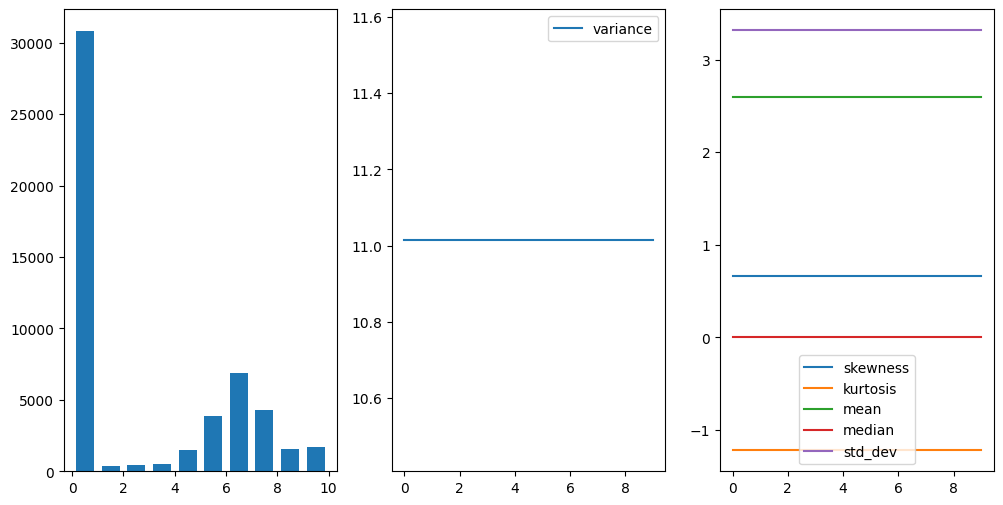

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.hist(df["vote_average"], rwidth = 0.7)

plt.subplot(1,3,2)
data_frame["variance"].plot()
plt.legend(["variance"])

plt.subplot(1,3,3)
data_frame["skewness"].plot()
data_frame["kurtosis"].plot()
data_frame["mean"].plot()
data_frame["median"].plot()
data_frame["std_dev"].plot()
plt.legend(["skewness", "kurtosis", "mean", "median", "std_dev"])
plt.show()

In [ ]:
chunks = [df[i:i+1000] for i in range(0, len(df), 1000)]
skewness = [chunk['vote_average'].skew() for chunk in chunks]
kurtosis = [chunk['vote_average'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[-0.3437808056109011, -0.6151844786765193, 0.4947231139355068, -0.36300754530478785, -0.6445993341403398, -0.5944190620838127, -0.38790424698138365, -0.04019923558165413, -0.23310057193924968, -0.242882165979034, -0.022292508072909455, -0.2044353886026687, -0.16282789083764126, -0.1807002972342404, -0.28984525181832604, -0.5149899243767553, -0.40809035923046083, -0.5303021264630507, -0.4262154859616404, -0.20048914442550794, -0.25562918932722106, 2.3875827307116575, 0, 0, 31.622776601683803, 0, 0, 31.622776601683785, 31.622776601683775, 0, 0, 31.622776601683796, 31.622776601683793, 0, 0, 0, 0, 31.622776601683793, 20.290084554887947, 31.622776601683782, 22.73414658969641, 31.622776601683775, 19.545301946135066, 31.62277660168379, 31.622776601683775, 0, 0, 31.622776601683775, 31.62277660168379, 31.622776601683775, 0, 0]
[0.11494712602791957, 2.747205311783952, 4.941983568782774, 4.086289470482823, 2.3953178700103916, 2.988302043365016, 1.3465490305439274, 1.4947382694551723, 0.6894178072

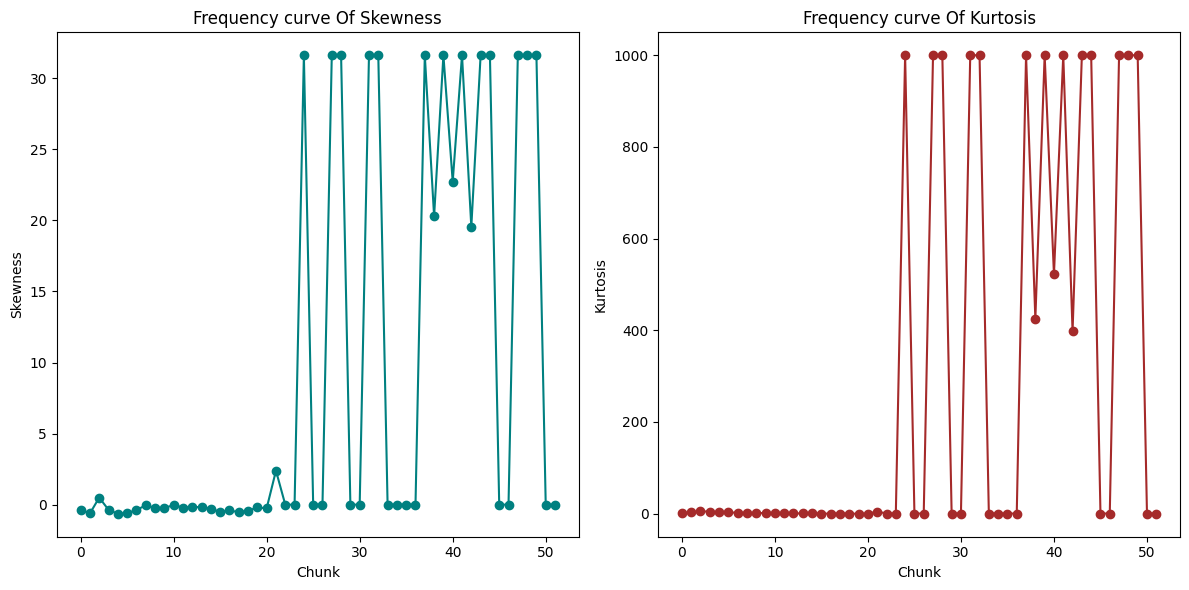

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

In [ ]:
max = df['vote_count'].max()
min = df['vote_count'].min()
mean = df['vote_count'].mean()
median = df['vote_count'].median()
std_dev = df['vote_count'].std()
var = df['vote_count'].var()
skew = df['vote_count'].skew()
kurt = df['vote_count'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 19463
min: 0
mean: 40.39537972855905
median: 0.0
standard deviation: 482.70594838482947
variance: 233005.03260609767
skewness: 22.96681499585165
kurtosis: 644.2871859211684


In [ ]:
df[(df['vote_count'] == 19463)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"


In [ ]:
max_life = int(df["vote_count"].max())
data_frame = pd.DataFrame({
    "mean":[mean for i in range(max_life)],
    "median":[median for i in range(max_life)],
    "std_dev":[std_dev for i in range(max_life)],
    "variance":[var for i in range(max_life)],
    "skewness":[skew for i in range(max_life)],
    "kurtosis":[kurt for i in range(max_life)]
})

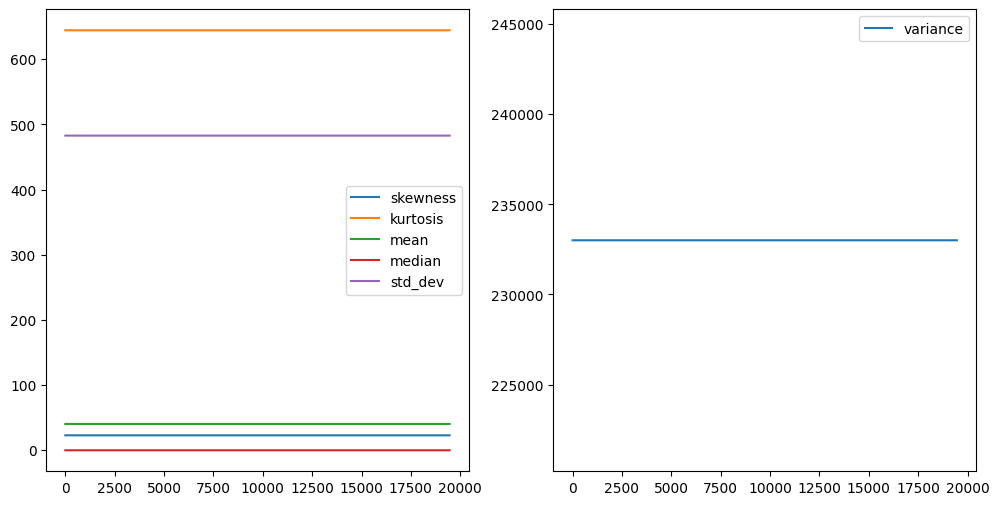

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,2)
data_frame["variance"].plot()
plt.legend(["variance"])

plt.subplot(1,2,1)
data_frame["skewness"].plot()
data_frame["kurtosis"].plot()
data_frame["mean"].plot()
data_frame["median"].plot()
data_frame["std_dev"].plot()
plt.legend(["skewness", "kurtosis", "mean", "median", "std_dev"])
plt.show()

As we can see median is 0 let's try to remove 0 values and then do the analysis again

In [ ]:
vote_analysis = df[(df['vote_count'] != 0) & (df['vote_average'] != 0)]
vote_analysis

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21161,247038,Mons the Cat,6.000,1,Released,1995-01-01,0,4,False,0,no,Katten Mons,0.635,Animation
21162,209441,WinneToons - Die Legende vom Schatz im Silbersee,5.000,1,Released,2009-11-10,0,0,False,0,de,WinneToons - Die Legende vom Schatz im Silbersee,0.600,"Family, Animation"
21163,351055,The Trumouse Show,6.000,1,Released,2003-09-04,0,6,False,0,en,The Trumouse Show,0.600,"Comedy, Animation"
21164,168121,Sons of Ram,4.000,1,Released,2012-11-02,0,85,False,400,hi,Sons of Ram,0.600,"Animation, Drama"


Analysis on vote average

In [ ]:
max = vote_analysis['vote_average'].max()
min = vote_analysis['vote_average'].min()
mean = vote_analysis['vote_average'].mean()
median = vote_analysis['vote_average'].median()
std_dev = vote_analysis['vote_average'].std()
var = vote_analysis['vote_average'].var()
skew = vote_analysis['vote_average'].skew()
kurt = vote_analysis['vote_average'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 10.0
min: 0.5
mean: 6.37718756506104
median: 6.457000000000001
standard deviation: 1.714849454917379
variance: 2.9407086530304314
skewness: -0.38049796818406834
kurtosis: 1.1982297107304034


In [ ]:
max_life = int(vote_analysis["vote_average"].max())
data_frame = pd.DataFrame({
    "mean":[mean for i in range(max_life)],
    "median":[median for i in range(max_life)],
    "std_dev":[std_dev for i in range(max_life)],
    "variance":[var for i in range(max_life)],
    "skewness":[skew for i in range(max_life)],
    "kurtosis":[kurt for i in range(max_life)]
})

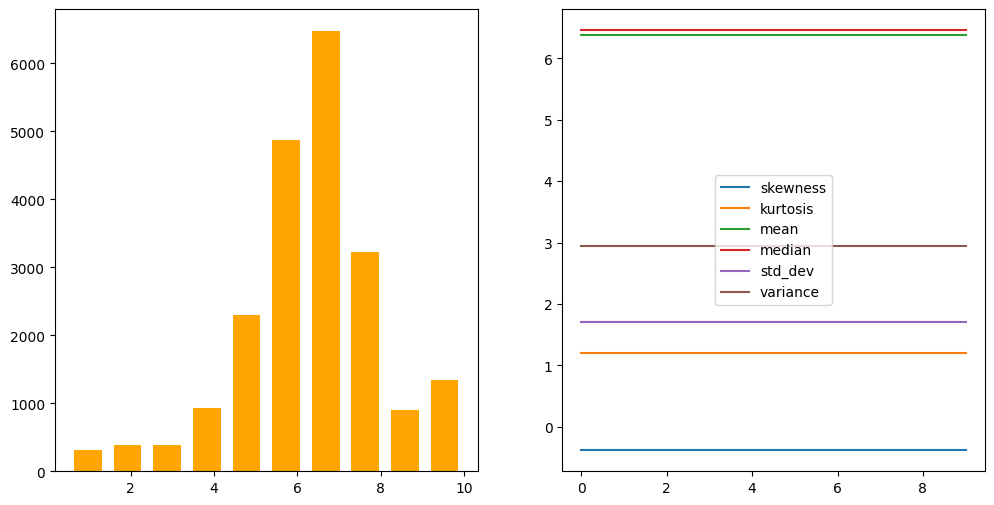

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.hist(vote_analysis["vote_average"], rwidth = 0.7, color = 'orange')

plt.subplot(1,2,2)
data_frame["skewness"].plot()
data_frame["kurtosis"].plot()
data_frame["mean"].plot()
data_frame["median"].plot()
data_frame["std_dev"].plot()
data_frame["variance"].plot()
plt.legend(["skewness", "kurtosis", "mean", "median", "std_dev", "variance"])
plt.show()

In [ ]:
chunks = [vote_analysis[i:i+1000] for i in range(0, len(vote_analysis), 1000)]
skewness = [chunk['vote_average'].skew() for chunk in chunks]
kurtosis = [chunk['vote_average'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[-0.3437808056109011, -0.6151844786765193, 0.4947231139355068, -0.36300754530478785, -0.6445993341403398, -0.5944190620838127, -0.38790424698138365, -0.04019923558165413, -0.23310057193924968, -0.242882165979034, -0.022292508072909455, -0.2044353886026687, -0.16282789083764126, -0.12514587706639788, -0.24462733378651574, -0.4595569760561247, -0.38629955021521223, -0.5009217983061495, -0.33005968526513224, -0.1702366610808507, -0.2695991998214913, -0.24219508912340076]
[0.11494712602791957, 2.747205311783952, 4.941983568782774, 4.086289470482823, 2.3953178700103916, 2.988302043365016, 1.3465490305439274, 1.4947382694551723, 0.6894178072326933, 1.2464046816545982, 0.4021289435929982, 0.5137179345045881, 0.2667757977794962, 0.05083658196845153, -0.05298433400646019, -0.23552550922778126, -0.2728552123589285, -0.06238555440358917, -0.40561226947889795, -0.5201088782430312, -0.5839473603965706, -0.8212826433362577]


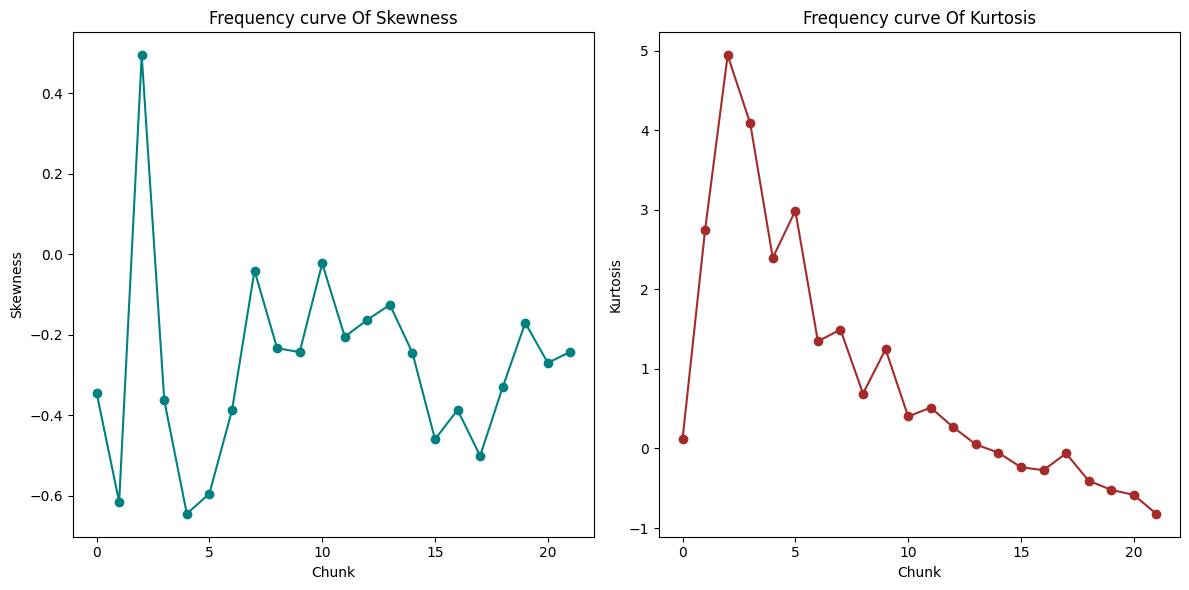

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

Analysis on vote count

In [ ]:
max = vote_analysis['vote_count'].max()
min = vote_analysis['vote_count'].min()
mean = vote_analysis['vote_count'].mean()
median = vote_analysis['vote_count'].median()
std_dev = vote_analysis['vote_count'].std()
var = vote_analysis['vote_count'].var()
skew = vote_analysis['vote_count'].skew()
kurt = vote_analysis['vote_count'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 19463
min: 1
mean: 99.28570076653733
median: 3.0
standard deviation: 752.9071074361684
variance: 566869.1124278981
skewness: 14.642339367777591
kurtosis: 261.2304805391611


In [ ]:
max_life = int(vote_analysis["vote_count"].max())
data_frame = pd.DataFrame({
    "mean":[mean for i in range(max_life)],
    "median":[median for i in range(max_life)],
    "std_dev":[std_dev for i in range(max_life)],
    "variance":[var for i in range(max_life)],
    "skewness":[skew for i in range(max_life)],
    "kurtosis":[kurt for i in range(max_life)]
})

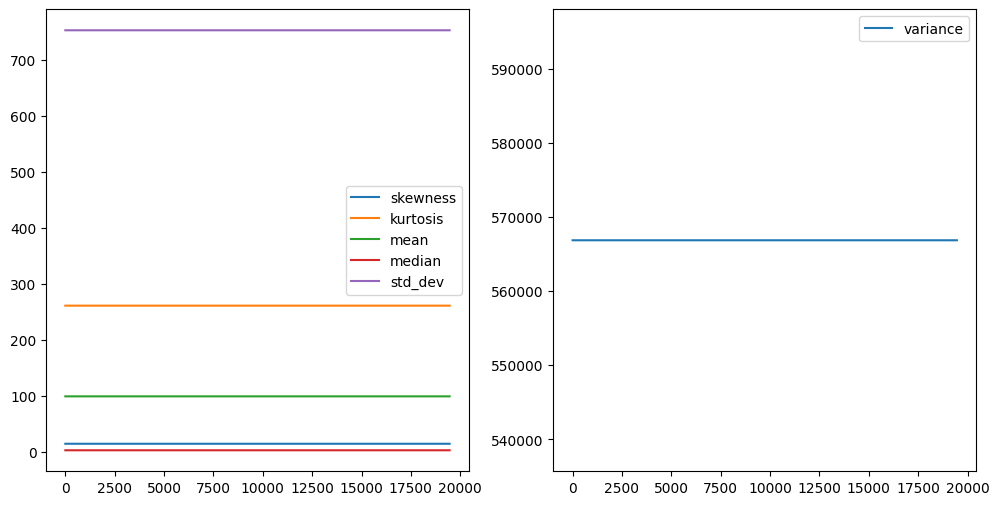

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,2)
data_frame["variance"].plot()
plt.legend(["variance"])

plt.subplot(1,2,1)
data_frame["skewness"].plot()
data_frame["kurtosis"].plot()
data_frame["mean"].plot()
data_frame["median"].plot()
data_frame["std_dev"].plot()
plt.legend(["skewness", "kurtosis", "mean", "median", "std_dev"])
plt.show()

In [ ]:
vote_analysis1000 = df[(df['vote_count'] >= 1000)]

In [ ]:
max = vote_analysis1000['vote_count'].max()
min = vote_analysis1000['vote_count'].min()
mean = vote_analysis1000['vote_count'].mean()
median = vote_analysis1000['vote_count'].median()
std_dev = vote_analysis1000['vote_count'].std()
var = vote_analysis1000['vote_count'].var()
skew = vote_analysis1000['vote_count'].skew()
kurt = vote_analysis1000['vote_count'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 19463
min: 1004
mean: 4293.809523809524
median: 2782.0
standard deviation: 3900.5726996128687
variance: 15214467.384965224
skewness: 1.7848430758310048
kurtosis: 2.927890358505173


In [ ]:
max = vote_analysis1000['vote_average'].max()
min = vote_analysis1000['vote_average'].min()
mean = vote_analysis1000['vote_average'].mean()
median = vote_analysis1000['vote_average'].median()
std_dev = vote_analysis1000['vote_average'].std()
var = vote_analysis1000['vote_average'].var()
skew = vote_analysis1000['vote_average'].skew()
kurt = vote_analysis1000['vote_average'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 8.539
min: 5.4
mean: 7.10275350140056
median: 7.103
standard deviation: 0.7040792862419352
variance: 0.49572764131495284
skewness: -0.16791146395367984
kurtosis: -0.6915450528773626


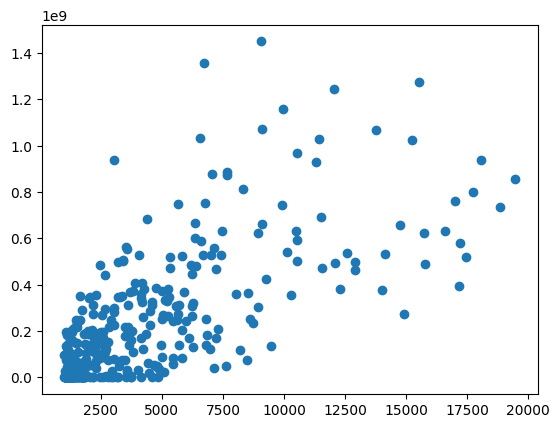

In [ ]:
plt.scatter(vote_analysis1000['vote_count'],vote_analysis1000['revenue'])

In [ ]:
max_life = int(vote_analysis1000["vote_count"].max())
data_frame = pd.DataFrame({
    "mean":[mean for i in range(max_life)],
    "median":[median for i in range(max_life)],
    "std_dev":[std_dev for i in range(max_life)],
    "variance":[var for i in range(max_life)],
    "skewness":[skew for i in range(max_life)],
    "kurtosis":[kurt for i in range(max_life)]
})

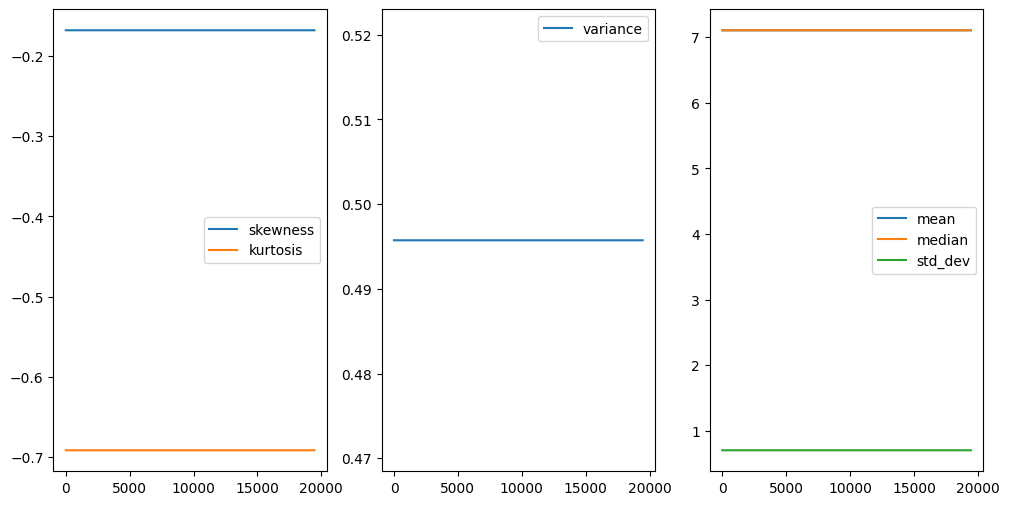

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
data_frame["skewness"].plot()
data_frame["kurtosis"].plot()
plt.legend(["skewness", "kurtosis"])

plt.subplot(1,3,2)
data_frame["variance"].plot()
plt.legend(["variance"])

plt.subplot(1,3,3)
data_frame["mean"].plot()
data_frame["median"].plot()
data_frame["std_dev"].plot()
plt.legend(["mean", "median", "std_dev"])
plt.show()

We can clearly see increase in mean, median, std_dev, variance and decrease in kurtosis and skewness after not taking data having vote count less than 1000

#Now let's work on budget, revenue and popularity

In [ ]:
df['popularity'].max()

1008.942

In [ ]:
df[(df['popularity'] == (df['popularity'].max()))]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
195,976573,Elemental,7.757,2467,Released,2023-06-14,486797988,102,False,200000000,en,Elemental,1008.942,"Animation, Comedy, Family, Fantasy, Romance"


In [ ]:
max = df['budget'].max()
min = df['budget'].min()
mean = df['budget'].mean()
median = df['budget'].median()
std_dev = df['budget'].std()
var = df['budget'].var()
skew = df['budget'].skew()
kurt = df['budget'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 260000000
min: 0
mean: 575951.2917508903
median: 0.0
standard deviation: 7606627.80490118
variance: 57860786562295.74
skewness: 17.686578167644484
kurtosis: 358.64790890575915


In [ ]:
df[(df['budget'] == 260000000)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
29,38757,Tangled,7.599,10539,Released,2010-11-24,592461732,100,False,260000000,en,Tangled,84.14,"Animation, Family"


In [ ]:
chunks = [df[i:i+1000] for i in range(0, len(df), 1000)]
skewness = [chunk['budget'].skew() for chunk in chunks]
kurtosis = [chunk['budget'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[2.0153065167546558, 6.850466742268051, 10.957686825007452, 12.091606468825148, 14.75844286254958, 14.21788349140412, 18.48731157502437, 16.43623228692379, 13.917054648010495, 20.1772696390024, 21.440174315600217, 17.783954593200594, 17.37504452731899, 31.549842388164137, 19.423967089609352, 31.166364641369952, 21.912069091494303, 30.93306164691171, 24.888089366213126, 20.721515000880235, 20.914918966242542, 31.01289354020441, 28.169321230806762, 18.771158290376068, 18.697529163977844, 24.77023199012323, 31.62247226335139, 31.621795457626877, 22.82605753360622, 16.943027682287912, 31.506726962317014, 31.31843834947317, 31.596162568448726, 30.7485645548073, 31.610038353189527, 31.327624132555254, 30.554361140839802, 31.546861027752936, 31.62045331670498, 31.622557205478923, 25.83266814427357, 31.44646429322235, 31.62277660168379, 31.353642870960208, 31.025185760908364, 28.787931290769468, 31.22628799690926, 22.84757064097845, 31.622776595644844, 26.985466641325022, 21.44115157647184, 28

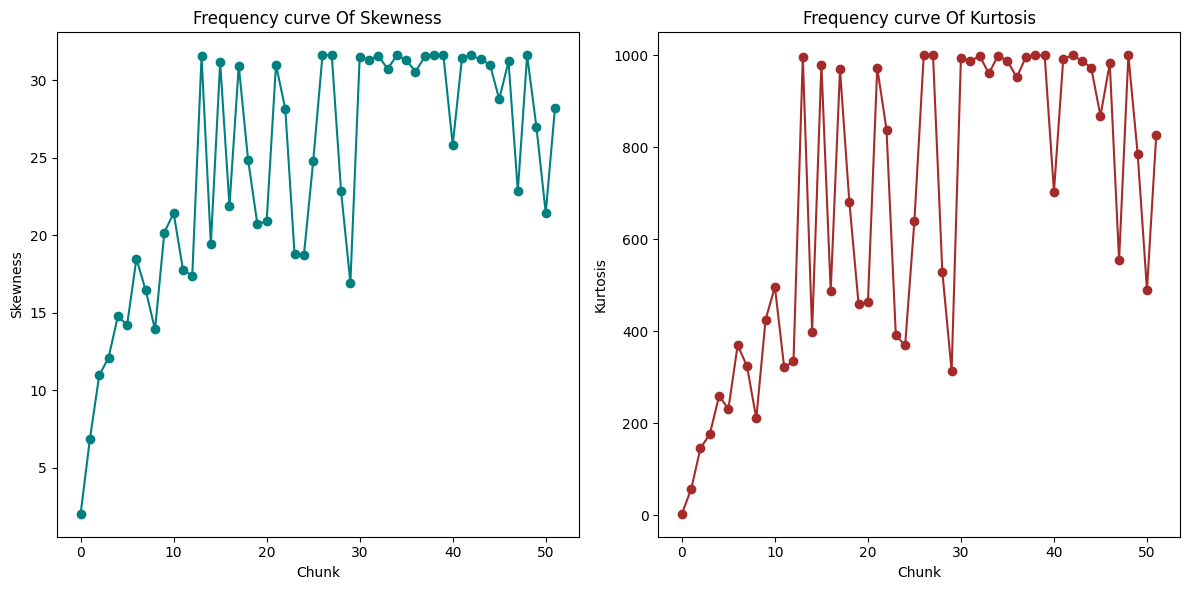

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

In [ ]:
max = df['revenue'].max()
min = df['revenue'].min()
mean = df['revenue'].mean()
median = df['revenue'].median()
std_dev = df['revenue'].std()
var = df['revenue'].var()
skew = df['revenue'].skew()
kurt = df['revenue'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 1450026933
min: 0
mean: 1863464.1101549717
median: 0.0
standard deviation: 30498240.436072595
variance: 930142669696493.5
skewness: 24.75418519641186
kurtosis: 748.7605724115051


In [ ]:
df[(df['revenue'] == 1450026933)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
40,330457,Frozen II,7.272,9060,Released,2019-11-20,1450026933,103,False,150000000,en,Frozen II,70.221,"Family, Animation, Adventure, Comedy, Fantasy"


In [ ]:
chunks = [df[i:i+1000] for i in range(0, len(df), 1000)]
skewness = [chunk['revenue'].skew() for chunk in chunks]
kurtosis = [chunk['revenue'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[3.203271083091538, 14.931760553661862, 16.65578370169342, 22.978848309823466, 13.629416874553694, 20.57449436817888, 18.817063909079423, 21.745106944151917, 21.576189996956117, 20.617330823700602, 26.89309394536228, 16.36339975223532, 18.92113497975616, 24.32208513306178, 31.064312721772005, 31.596983993694714, 29.832837419367387, 31.61967441801666, 30.94767210199161, 31.567489052773748, 31.31629480196258, 31.622511551563775, 31.5814327428189, 31.599328312108256, 31.612309671650138, 30.63128060364571, 15.879720317709456, 31.617921282270604, 31.61595110632356, 29.64730951769864, 31.621744918121053, 31.62277659092004, 31.62277654843583, 27.98917565103723, 31.622670731569084, 28.077481128189856, 31.622776601683785, 31.622776601295815, 30.222890345789533, 31.622776601683782, 22.3266124696512, 30.086620589767403, 31.622776601683785, 26.65370024868831, 31.61786784501593, 0, 31.622774700769085, 31.611218915323967, 31.62277660168379, 31.620841680336987, 31.61107954592371, 27.597347183964306]


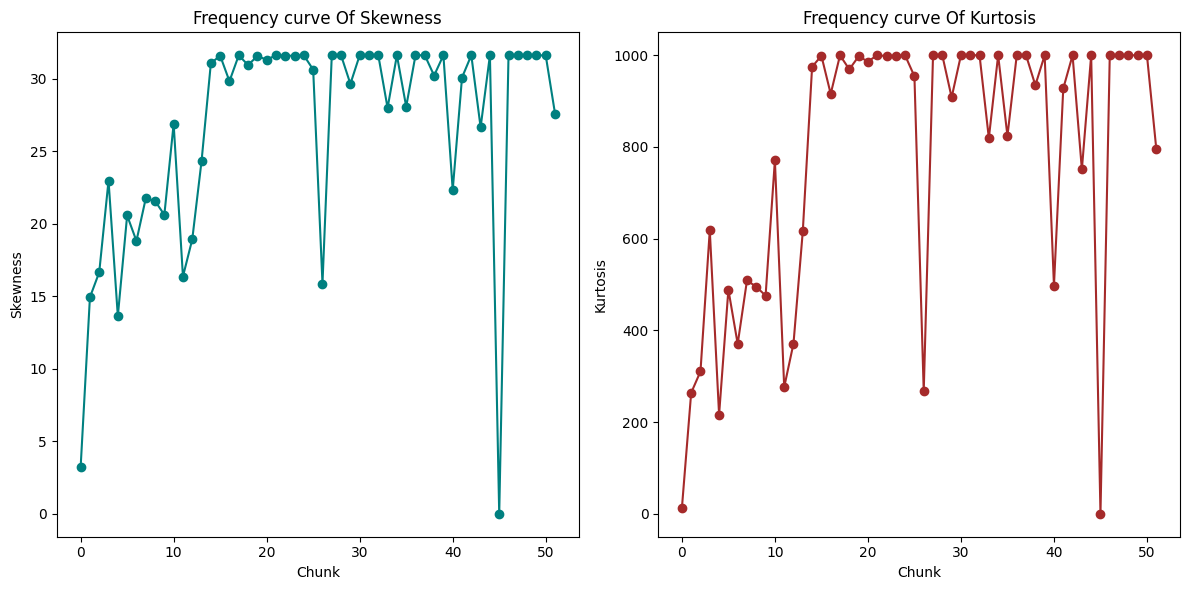

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

In [ ]:
bud_rev = df[(df['budget'] != 0) & (df['revenue'] != 0)]
bud_rev

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49668,577323,Spaggheti Western,0.000,0,Released,2007-12-19,100000,12,False,20000,es,Espagueti Western,0.600,"Animation, Western"
50069,597181,The Green Marker Scare,0.000,0,Released,2012-10-22,67205,70,False,58303,en,The Green Marker Scare,0.806,"Horror, Animation, Mystery, Crime, Thriller"
51192,646484,HX-01,0.000,0,Released,2017-04-14,12000,37,False,8000,en,HX-01,0.600,Animation
51451,642399,Fear of the Moth,0.000,0,Released,2018-05-18,2,8,False,30,en,Fear of the Moth,0.600,"Thriller, Animation"


In [ ]:
max = bud_rev['budget'].max()
min = bud_rev['budget'].min()
mean = bud_rev['budget'].mean()
median = bud_rev['budget'].median()
std_dev = bud_rev['budget'].std()
var = bud_rev['budget'].var()
skew = bud_rev['budget'].skew()
kurt = bud_rev['budget'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 260000000
min: 1
mean: 41145958.854714066
median: 18000000.0
standard deviation: 52124609.926450066
variance: 2716974959984576.5
skewness: 1.4226458277001819
kurtosis: 1.2597532611393039


In [ ]:
chunks = [bud_rev[i:i+100] for i in range(0, len(bud_rev), 100)]
skewness = [chunk['budget'].skew() for chunk in chunks]
kurtosis = [chunk['budget'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[0.005474243358115612, 0.40626804493349755, 1.032111857691497, 2.0009173187639013, 2.050414920797488, 9.392526542217833, 6.844779437906966]
[-0.7900185589563908, -0.48397628461028086, 1.1834517099240078, 5.5364264523844895, 5.032237767060492, 91.38548458293485, 46.897321020997204]


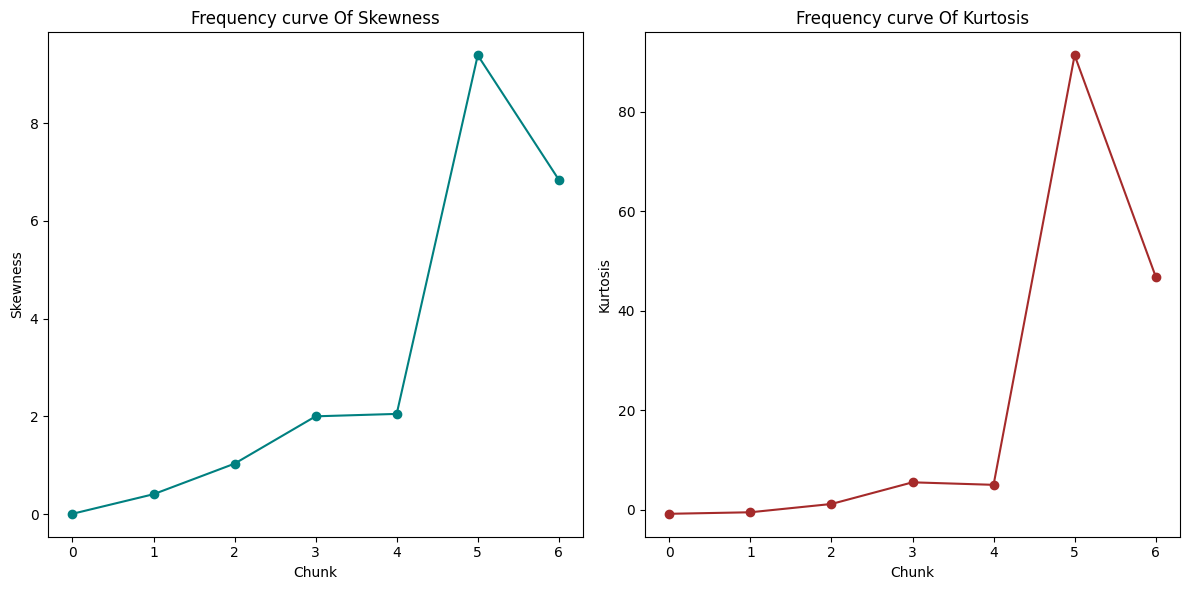

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

In [ ]:
max = bud_rev['revenue'].max()
min = bud_rev['revenue'].min()
mean = bud_rev['revenue'].mean()
median = bud_rev['revenue'].median()
std_dev = bud_rev['revenue'].std()
var = bud_rev['revenue'].var()
skew = bud_rev['revenue'].skew()
kurt = bud_rev['revenue'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 1450026933
min: 1
mean: 137736252.65842348
median: 22182353.0
standard deviation: 233945954.46940362
variance: 5.473070961260028e+16
skewness: 2.4558655682470643
kurtosis: 6.679584540574066


In [ ]:
chunks = [bud_rev[i:i+100] for i in range(0, len(bud_rev), 100)]
skewness = [chunk['revenue'].skew() for chunk in chunks]
kurtosis = [chunk['revenue'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[0.7475783080362057, 1.2073229891095434, 1.1078898420363954, 7.358913943049158, 5.859603128346125, 9.087649934447224, 6.851682259616205]
[0.18364698812130387, 2.3263939334007824, 0.6798926689760516, 64.49798152406453, 43.2389724614814, 85.81115316134422, 46.962506585613184]


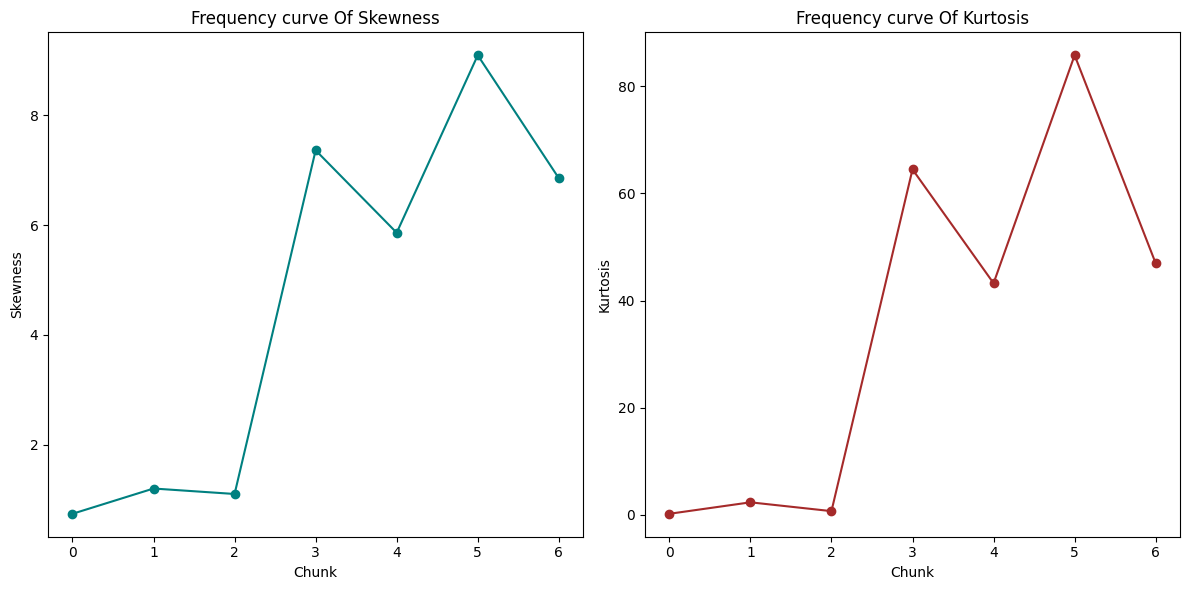

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

#Now let's work on profit

So for profit we atleast should have some revenue so we will exclude data which has zero revenue

In [ ]:
rev = df[(df['revenue'] != 0)]
rev

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51192,646484,HX-01,0.000,0,Released,2017-04-14,12000,37,False,8000,en,HX-01,0.600,Animation
51209,644920,Bulmaca Kulesi: Dev Kuşun Gizemi,0.000,0,Released,2019-10-15,149485,0,False,0,tr,Bulmaca Kulesi: Dev Kuşun Gizemi,0.600,"Animation, Adventure"
51451,642399,Fear of the Moth,0.000,0,Released,2018-05-18,2,8,False,30,en,Fear of the Moth,0.600,"Thriller, Animation"
51544,664389,The Secret Princess,0.000,0,Released,2014-12-01,500000,94,False,0,en,The Secret Princess,0.600,Animation


Now first see which movies are in loss

In [ ]:
neg = rev[(rev['revenue'] < rev['budget'])]
neg

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
36,508442,Soul,8.150,9473,Released,2020-12-25,136384442,101,False,150000000,en,Soul,48.876,"Animation, Family, Comedy, Fantasy, Drama"
52,508943,Luca,7.865,7625,Released,2021-06-17,49750471,95,False,200000000,en,Luca,60.762,"Animation, Comedy, Fantasy, Adventure, Family"
86,508439,Onward,7.726,5687,Released,2020-02-29,141940042,103,False,200000000,en,Onward,25.372,"Family, Animation, Adventure, Comedy, Fantasy"
102,10386,The Iron Giant,7.925,5105,Released,1999-08-06,23159305,86,False,70000000,en,The Iron Giant,41.390,"Family, Animation, Science Fiction, Drama"
109,12477,Grave of the Fireflies,8.455,4861,Released,1988-04-16,516962,89,False,3700000,ja,火垂るの墓,0.600,"Animation, Drama, War"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43025,309803,The Adventure of Sudsakorn,0.000,0,Released,1979-04-13,62700,82,False,157000,en,สุดสาคร,0.840,"Adventure, Animation, Fantasy"
44251,747968,Venus,0.000,0,Released,2020-10-23,20,3,False,50,en,Venus,0.600,"Animation, Fantasy, Romance"
44546,774012,YLLI,0.000,0,Released,2020-12-05,100,6,False,126,es,YLLI,0.608,"Animation, Fantasy, Mystery"
46126,724679,Earth Day 50 Grand Prize,0.000,0,Released,2020-04-22,100,5,False,2020,en,Earth Day 50 Grand Prize,0.600,"Animation, History"


In [ ]:
neg['loss'] =  neg['budget'] - neg['revenue']
col = ['title', 'budget', 'revenue', 'loss']
neg = neg[col]
neg

<ipython-input-75-1806e61393e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['loss'] =  neg['budget'] - neg['revenue']


,title,budget,revenue,loss
36,Soul,150000000,136384442,13615558
52,Luca,200000000,49750471,150249529
86,Onward,200000000,141940042,58059958
102,The Iron Giant,70000000,23159305,46840695
109,Grave of the Fireflies,3700000,516962,3183038
...,...,...,...,...
43025,The Adventure of Sudsakorn,157000,62700,94300
44251,Venus,50,20,30
44546,YLLI,126,100,26
46126,Earth Day 50 Grand Prize,2020,100,1920


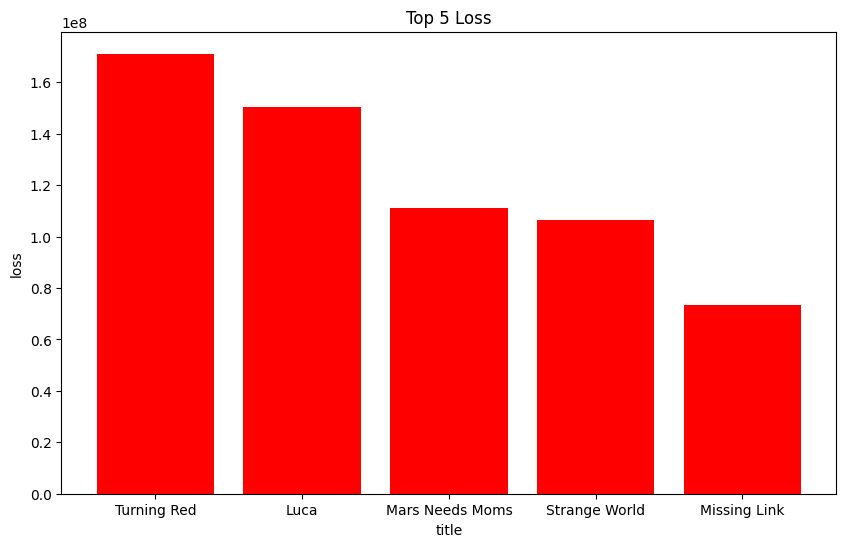

In [ ]:
neg.set_index('title', inplace=True)
top5_loss = neg.nlargest(5, 'loss')
plt.figure(figsize=(10, 6))
plt.bar(top5_loss.index, top5_loss['loss'], color='red')
plt.xlabel('title')
plt.ylabel('loss')
plt.title('Top 5 Loss')
plt.show()

In [ ]:
max = neg['loss'].max()
min = neg['loss'].min()
mean = neg['loss'].mean()
median = neg['loss'].median()
std_dev = neg['loss'].std()
var = neg['loss'].var()
skew = neg['loss'].skew()
kurt = neg['loss'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 171120078
min: 9
mean: 14933011.186046511
median: 6380281.5
standard deviation: 24595587.263824042
variance: 604942912852383.5
skewness: 3.530675313727846
kurtosis: 15.817754776918692


In [ ]:
chunks = [neg[i:i+30] for i in range(0, len(neg), 30)]
skewness = [chunk['loss'].skew() for chunk in chunks]
kurtosis = [chunk['loss'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[2.1276284754560844, 2.331746824762407, 1.6830355572438556, 2.3472433944148903, 1.4146951484073216, 4.6405936526634015]
[4.436388919327294, 5.846980890860307, 2.4359271456972773, 6.866123128147626, 2.0792580271256083, 21.657257155338577]


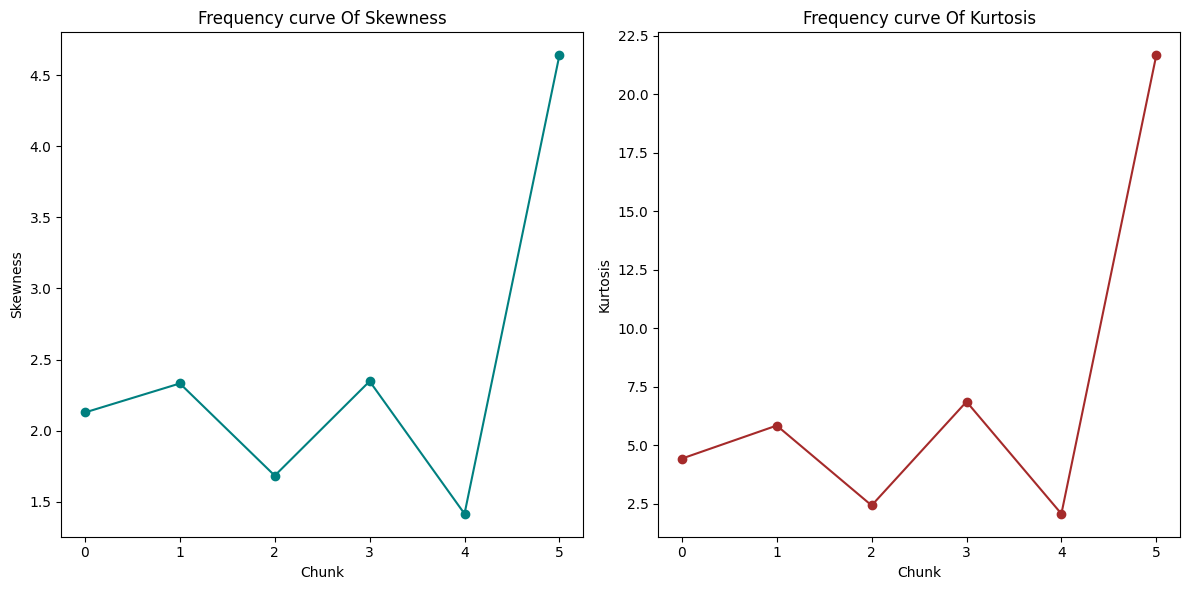

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

Now for movies in profit

In [ ]:
prof = rev[(rev['revenue'] > rev['budget'])]
prof

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,58.517,"Animation, Family, Science Fiction"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50582,669919,Maceracı Yüzgeçler: Büyük Gösteri,0.000,0,Released,2020-01-24,103079,0,False,0,tr,Maceracı Yüzgeçler: Büyük Gösteri,0.662,"Animation, Adventure"
51189,646120,O Show da Luna – Das Ilhas ao Continente,0.000,0,Released,2019-08-20,4,0,False,0,pt,O Show da Luna – Das Ilhas ao Continente,0.600,Animation
51192,646484,HX-01,0.000,0,Released,2017-04-14,12000,37,False,8000,en,HX-01,0.600,Animation
51209,644920,Bulmaca Kulesi: Dev Kuşun Gizemi,0.000,0,Released,2019-10-15,149485,0,False,0,tr,Bulmaca Kulesi: Dev Kuşun Gizemi,0.600,"Animation, Adventure"


In [ ]:
prof['profit'] = prof['revenue'] - prof['budget']
col = ['title', 'budget', 'revenue', 'profit']
prof = prof[col]
prof

<ipython-input-81-0f0ad129ce82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof['profit'] = prof['revenue'] - prof['budget']


,title,budget,revenue,profit
0,Inside Out,175000000,857611174,682611174
1,Up,175000000,735099082,560099082
2,Finding Nemo,94000000,940335536,846335536
3,Coco,175000000,800526015,625526015
4,WALL·E,180000000,521311860,341311860
...,...,...,...,...
50582,Maceracı Yüzgeçler: Büyük Gösteri,0,103079,103079
51189,O Show da Luna – Das Ilhas ao Continente,0,4,4
51192,HX-01,8000,12000,4000
51209,Bulmaca Kulesi: Dev Kuşun Gizemi,0,149485,149485


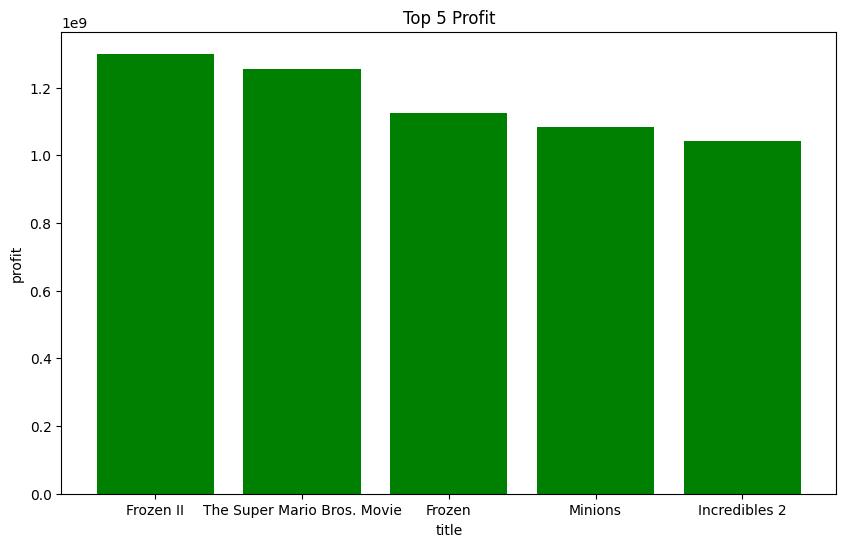

In [ ]:
prof.set_index('title', inplace=True)
top5_profit = prof.nlargest(5, 'profit')
plt.figure(figsize=(10, 6))
plt.bar(top5_profit.index, top5_profit['profit'], color='green')
plt.xlabel('title')
plt.ylabel('profit')
plt.title('Top 5 Profit')
plt.show()

In [ ]:
max = prof['profit'].max()
min = prof['profit'].min()
mean = prof['profit'].mean()
median = prof['profit'].median()
std_dev = prof['profit'].std()
var = prof['profit'].var()
skew = prof['profit'].skew()
kurt = prof['profit'].kurt()
print(f'max: {max}')
print(f'min: {min}')
print(f"mean: {mean}")
print(f'median: {median}')
print(f'standard deviation: {std_dev}')
print(f'variance: {var}')
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

max: 1300026933
min: 1
mean: 85381086.55751173
median: 11951900.5
standard deviation: 176110972.82010007
variance: 3.1015074747642024e+16
skewness: 3.3195992776945134
kurtosis: 12.934495119034645


In [ ]:
chunks = [prof[i:i+30] for i in range(0, len(prof), 30)]
skewness = [chunk['profit'].skew() for chunk in chunks]
kurtosis = [chunk['profit'].kurtosis() for chunk in chunks]
print(skewness)
print(kurtosis)

[0.8746430944619945, 0.788077095002187, 1.9546248995971005, 1.0795482028969254, 0.4030910504674381, 2.9888832709681723, 0.999597846714634, 1.2259053825228878, 1.2567161572924903, 1.6181899641084836, 3.576776731080438, 1.4284462080346618, 1.2582888884761274, 5.365916514317325, 4.619945842668134, 3.913955468732078, 4.272479404886813, 3.6446414955613045, 4.090243573903747, 2.495651945953793, 1.193922255962532, 4.4442552317488175, 3.8151512638358342, 2.547213635098449, 2.189824823208366, 5.339935519723753, 4.6933341160969695, 5.465809324738792, 2.5341782195546334]
[-0.1591303389537937, 0.2800835488999911, 4.611781928638559, 1.6538759073922873, -0.9457237579466216, 11.230453173889659, 0.07383136971460225, 1.7388425912170065, 1.382763318687354, 1.71941919989442, 15.748870427368528, 1.2452055338614438, 0.6922067838780612, 29.14860295008915, 23.19405765415435, 16.27440974977013, 19.72804136217019, 15.38538418178406, 19.09756833236987, 5.25750945613361, -0.046668749886627836, 21.784309672489737

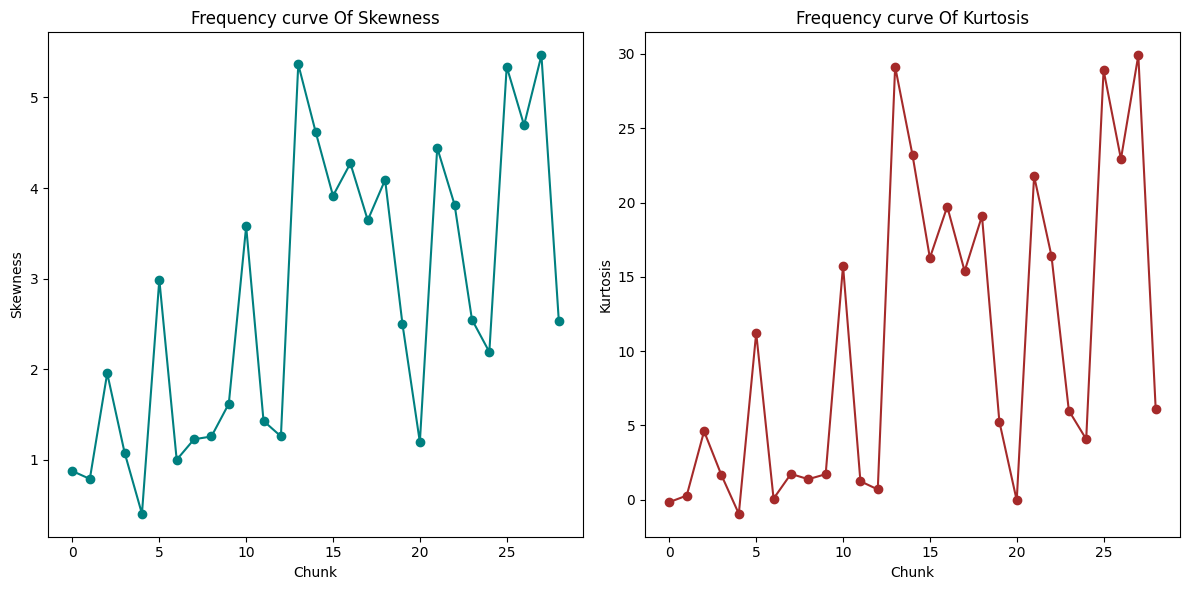

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(skewness)), skewness, color='teal', marker='o', linestyle='-')
plt.title('Frequency curve Of Skewness')
plt.xlabel('Chunk')
plt.ylabel('Skewness')

plt.subplot(1,2,2)
plt.plot(np.arange(len(kurtosis)), kurtosis, color='brown', marker='o', linestyle='-')
plt.title('Frequency curve Of Kurtosis')
plt.xlabel('Chunk')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

#Predicting movie success based on revenue or vote count

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (replace 'path_to_dataset' with the actual path)
data = df.copy()

# Define target variable: Success based on revenue or vote count
# Example: A movie is successful if its revenue is above a certain threshold
success_threshold = 100000000  # Set your threshold here
data['success'] = (data['revenue'] > success_threshold).astype(int)

# Select features and target variable
features = ['budget', 'vote_average', 'runtime']
target = 'success'

X = data[features]
y = data[target]

# Data preprocessing: handle missing values and encode categorical variables if any

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9974010973144672
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10348
           1       0.68      0.63      0.66        41

    accuracy                           1.00     10389
   macro avg       0.84      0.82      0.83     10389
weighted avg       1.00      1.00      1.00     10389



It seems like the accuracy of the model is very high, which could be a sign of overfitting, especially considering the class imbalance. Let's discuss the metrics reported in the classification report:

Accuracy: The overall accuracy of the model is 0.9974, indicating that the model correctly predicts movie success or failure in the vast majority of cases.

Precision: Precision measures the proportion of correctly predicted successful movies out of all movies predicted as successful. In this case, the precision for predicting successful movies (class 1) is 0.68, which means that about 68% of the movies predicted as successful are actually successful.

Recall: Recall measures the proportion of correctly predicted successful movies out of all actual successful movies in the dataset. The recall for predicting successful movies (class 1) is 0.63, indicating that the model correctly identifies about 63% of all successful movies.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. The F1-score for predicting successful movies (class 1) is 0.66.

Support: Support refers to the number of occurrences of each class in the testing set. In this case, there are 10,348 instances of unsuccessful movies (class 0) and 41 instances of successful movies (class 1).

Macro avg: The macro average of precision, recall, and F1-score computes the average of these metrics across all classes, giving equal weight to each class.

Weighted avg: The weighted average of precision, recall, and F1-score computes the average of these metrics across all classes, weighted by the number of true instances for each class. This is particularly useful in imbalanced datasets.

**Using decision trees for runtime analysis and predicting movie runtime categories (short, medium, long).**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values
data.dropna(inplace=True)

# Define runtime categories (e.g., short, medium, long)
short_runtime_threshold = 90  # Define your threshold for short runtime (in minutes)
long_runtime_threshold = 150  # Define your threshold for long runtime (in minutes)

# Convert runtime values into categorical runtime categories
data['runtime_category'] = pd.cut(data['runtime'], bins=[0, short_runtime_threshold, long_runtime_threshold, float('inf')],
                                  labels=['short', 'medium', 'long'])

# Select features and target variable
features = ['budget', 'vote_average']
target = 'runtime_category'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9425713643515397
              precision    recall  f1-score   support

        long       0.00      0.00      0.00        48
      medium       0.33      0.15      0.21       396
       short       0.96      0.99      0.97      8454

    accuracy                           0.94      8898
   macro avg       0.43      0.38      0.39      8898
weighted avg       0.92      0.94      0.93      8898



The accuracy of the model is approximately 0.943, which indicates that the model correctly predicts the runtime category for around 94.3% of the movies in the testing set. However, the precision, recall, and F1-score for the "long" category are all 0.00, indicating that the model struggles to correctly predict this category.

Here's a breakdown of the classification report:

Precision: Precision measures the proportion of correctly predicted instances of a class out of all instances predicted as that class. For the "long" category, precision is 0.00, indicating that none of the instances predicted as "long" are actually "long".
Recall: Recall measures the proportion of correctly predicted instances of a class out of all actual instances of that class. For the "long" category, recall is 0.00, indicating that none of the actual "long" instances are predicted as "long".
F1-score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For the "long" category, the F1-score is 0.00, reflecting the poor performance of the model in predicting this category.
Support: Support refers to the number of actual instances of each class in the testing set.


**Analyzing factors influencing movie popularity and predicting whether a movie will be popular or not using decision trees is a feasible approach.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values
data.dropna(inplace=True)

# Define popularity: Example - consider movies with a certain level of vote average as popular
popularity_threshold = 7.5  # Define your threshold for popularity

# Convert vote average to binary popularity label
data['popular'] = (data['vote_average'] >= popularity_threshold).astype(int)

# Select features and target variable
features = ['budget', 'runtime']  # Add more features as needed
target = 'popular'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9098673859294223
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8112
           1       0.39      0.03      0.06       786

    accuracy                           0.91      8898
   macro avg       0.65      0.51      0.51      8898
weighted avg       0.87      0.91      0.87      8898



The accuracy of the model is approximately 0.910, indicating that the model correctly predicts whether a movie will be popular or not for around 91.0% of the movies in the testing set.

However, looking at the classification report:

Precision: Precision measures the proportion of correctly predicted instances of a class out of all instances predicted as that class. For the popular class (1), the precision is 0.39, indicating that only 39% of the instances predicted as popular are actually popular.
Recall: Recall measures the proportion of correctly predicted instances of a class out of all actual instances of that class. For the popular class (1), the recall is 0.03, indicating that only 3% of the actual popular instances are predicted as popular.
F1-score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For the popular class (1), the F1-score is very low, reflecting the poor performance of the model in predicting this class.
Support: Support refers to the number of actual instances of each class in the testing set.

#K-means clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
features = ['budget', 'runtime', 'vote_average']

# Check for non-numeric values in each feature column
non_numeric_values = data[features].applymap(lambda x: isinstance(x, str))

# Remove rows with non-numeric values
data = data[~non_numeric_values.any(axis=1)]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# Train the K-means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Analyze clusters
cluster_analysis = data.groupby('cluster')[features].mean()

print(cluster_analysis)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               budget     runtime  vote_average
cluster                                        
0        3.576178e+05   34.827290      6.522056
1        7.997036e+03   14.485408      0.080508
2        1.073773e+08  113.177885      6.701822


The output shows the mean values of the features budget, runtime, and vote average for each cluster generated by K-means clustering.

Here's the interpretation of the results:

Cluster 0: This cluster has movies with a moderate budget (approximately $357,618), relatively short runtime (around 34.83 minutes), and average vote rating of about 6.52.

Cluster 1: This cluster consists of movies with a low budget (about $7,997), very short runtime (around 14.49 minutes), and extremely low vote average (approximately 0.08).

Cluster 2: This cluster represents movies with a high budget (around $107,377,300), longer runtime (approximately 113.18 minutes), and slightly higher than average vote rating (about 6.70).

These results provide insights into the characteristics of movies within each cluster. Cluster 2 seems to contain big-budget movies with longer runtimes and relatively higher vote ratings. Cluster 0 appears to represent movies with moderate budgets and runtimes, while Cluster 1 consists of movies with low budgets, very short runtimes, and extremely low vote ratings.